In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import h5py

In [ ]:
sample_freq = 500   # Hz

metadata = pd.read_csv('metadata.csv')
metadata = metadata.drop(columns=['Date', 'Patient_ID'])
metadata['Age'].astype(np.int32)
metadata['N'].astype(np.int32)

health_metadata = metadata.loc[metadata['AHA_Code'] == '1']

health_metadata

,ECG_ID,AHA_Code,Age,Sex,N
1,A00002,1,32,M,6000
2,A00003,1,63,M,6500
5,A00006,1,46,F,5000
7,A00008,1,32,M,5000
8,A00009,1,48,F,6000
...,...,...,...,...,...
25754,A25755,1,44,M,5000
25755,A25756,1,76,F,5000
25756,A25757,1,55,F,5000
25763,A25764,1,20,M,5000


In [36]:
health_ECG_ID = health_metadata['ECG_ID'].values

In [45]:
N = 1

signals = []

for i in health_ECG_ID[0:10]:
    with h5py.File(f'records/record1/{i}.h5', 'r') as f:
        signals.append(f['ecg'][()])

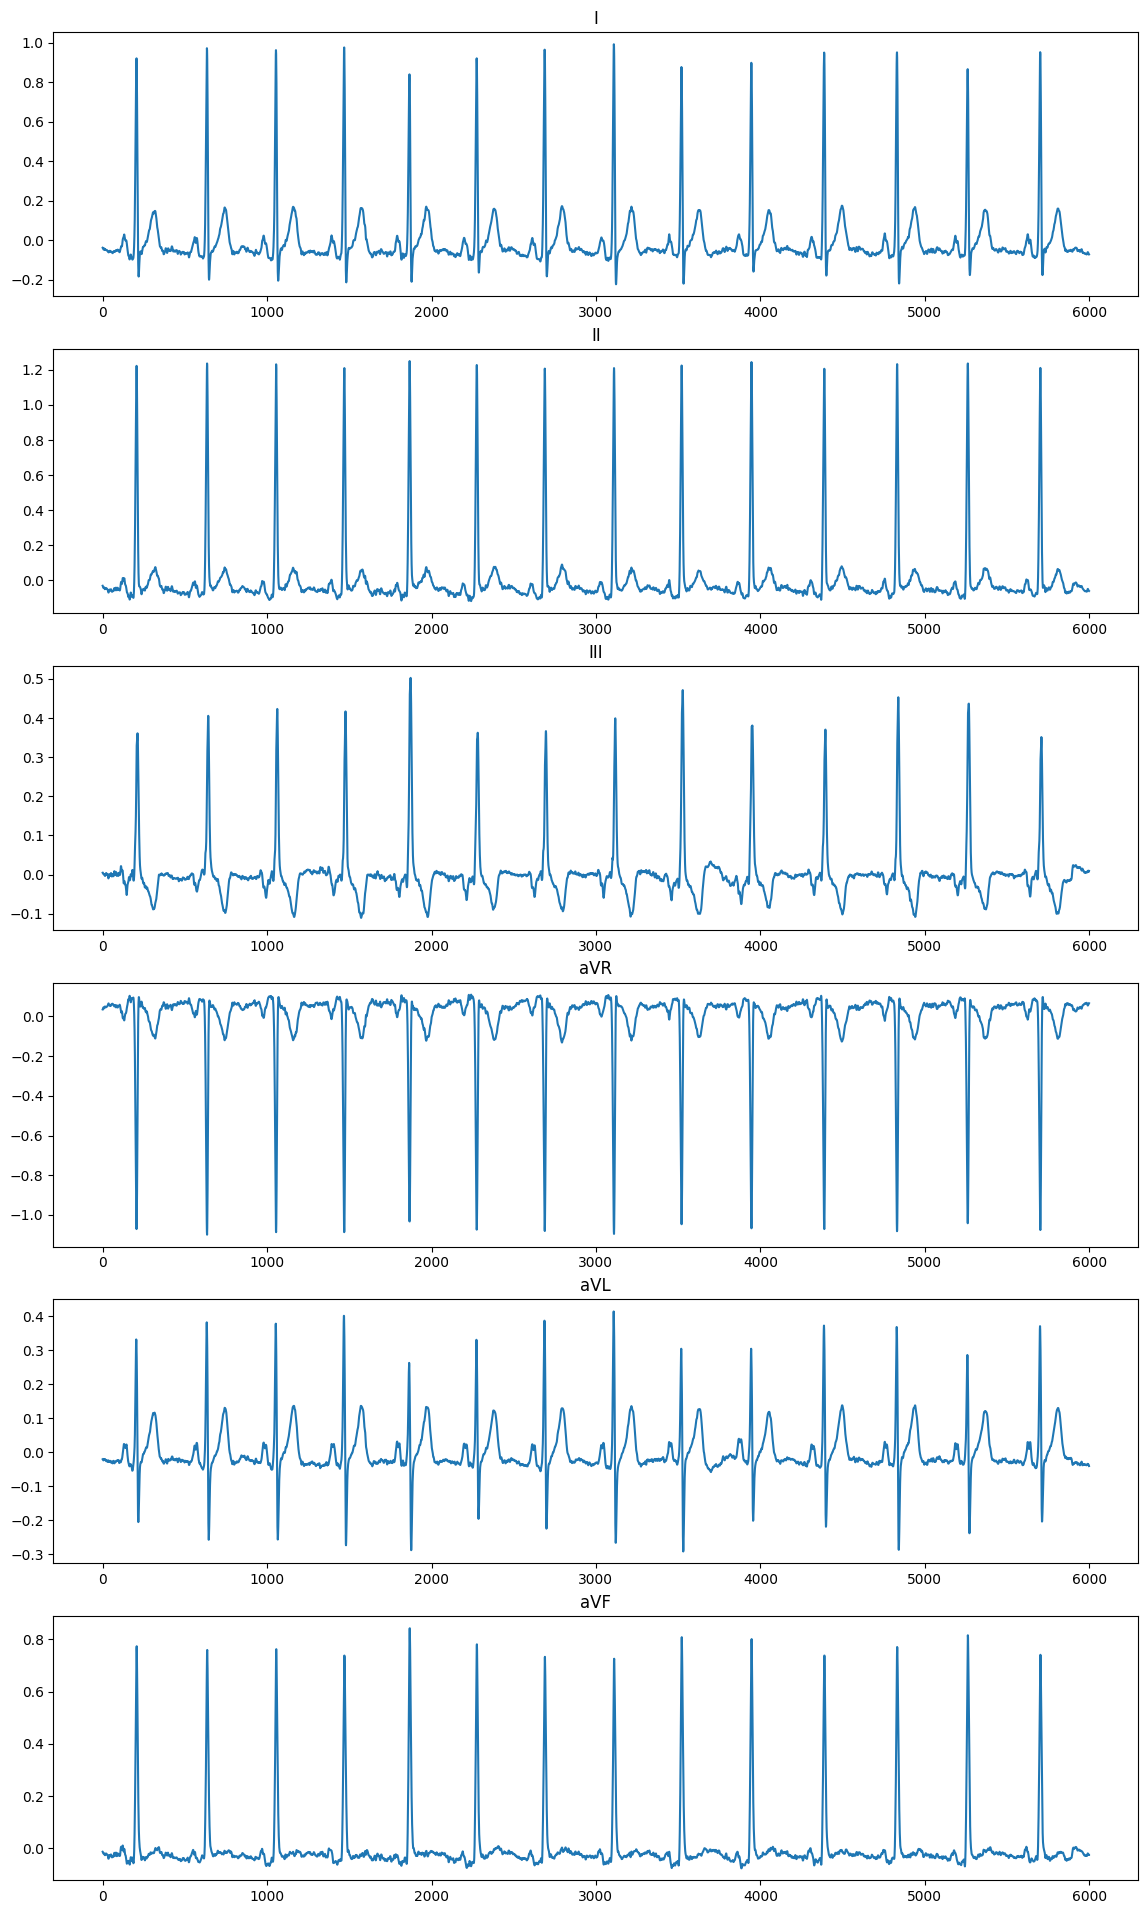

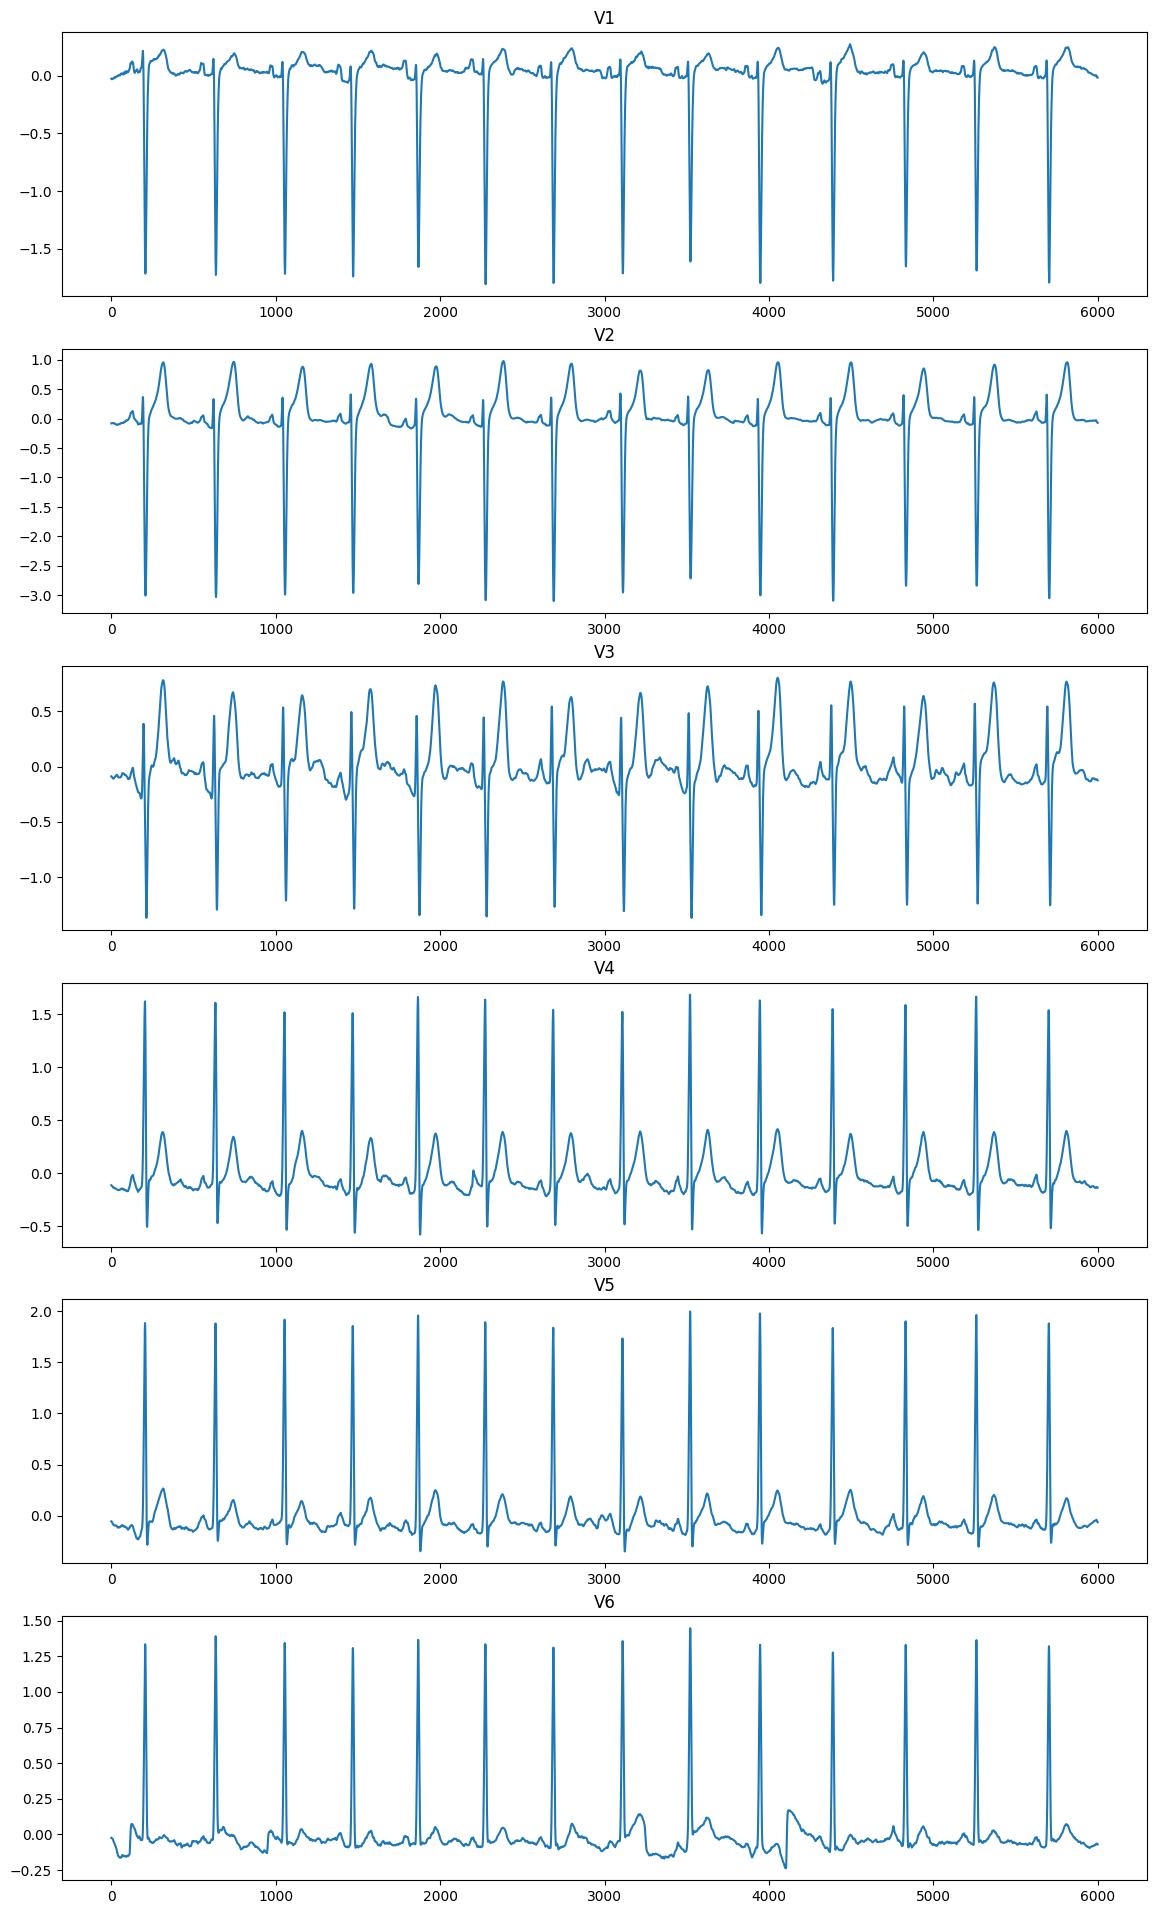

In [58]:
def visualize_12_channels(signal):
    ecg_order = ['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']

    plt.rcParams['figure.figsize'] = [14, 24]
    for i in range(0,6):
        plt.subplot(int(f'61{i + 1}'))
        plt.title(ecg_order[i])
        plt.plot(signal[i])
    plt.show()

    plt.rcParams['figure.figsize'] = [14, 24]
    for i in range(6,12):
        plt.subplot(int(f'61{i - 5}'))
        plt.title(ecg_order[i])
        plt.plot(signal[i])

    plt.show()

visualize_12_channels(signals[0])

In [59]:
# 10 пациентов для разметки
health_patients_10 = health_ECG_ID[0:10]